In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import csv

In [ ]:
## get information of more transformed and less transformed {id:more_tran{},less_tran{}}
## compute the weight for transformation degree
trans_degree = {}
with open('COSTRA1.1.tsv') as f:
  file = csv.reader(f, delimiter ='\t')
  for line in file:
    more_trans = [int(i) for i in line[4].split(",") if len(line[4])!=0]
    less_trans = [int(i) for i in line[5].split(",") if len(line[5])!=0]
    trans_degree[line[0]] = round((len(less_trans)+1)/(len(more_trans)+len(less_trans)+1),2)


In [ ]:
## process data and return vectors (distance from seed) and labels
def data_process(file_name):
  data,labels = [],[]
  deriv,seed = {1:[]},{} ## index information about derivative and seed sentences
  pre = '1' ## initialization
  
  with open(file_name,"r") as file:
    count = 0
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
      data.append([float(i) for i in line[3:]])
      labels.append(line[2])
            
      if line[2] == 'seed': 
        seed[int(line[1])] = int(line[0])
      
      if line[1] == pre: 

        deriv[int(line[1])].append(int(line[0]))
      else:
          deriv[int(line[1])] = []

      pre = line[1]
      count+=1
  ## subtract derivation sentences from the seed    
  for i in seed.keys():
    for j in deriv[i]: ## j is row number to be changed
      for k in range(len(data[0])):
        data[j][k] = data[j][k] - data[seed[i]][k]
  return data,labels

In [ ]:

## output 【data】lists of vectors (one list is from one seed)【label】
def get_seed_deriv(file_name):
  vector,vectors,label,labels,transform,transforms = [],[],[],[],[],[]
  with open(file_name,"r") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    pre ='1' ## initialization
    for line in tsv_file:
      if line[1] == pre: 
        vector.append([float(i) for i in line[3:]])
        label.append(line[2])
        transform.append(trans_degree[line[0]])
      else:
        vectors.append(vector)
        labels.append(label)
        transforms.append(transform)
        vector,label,transform = [[float(i) for i in line[3:]]],[line[2]],[trans_degree[line[0]]]
      pre = line[1]

  return vectors,labels,transforms

In [ ]:
## dimension reduction to nD

def pca_result_nD(data,n):
  input = np.array(data)
  pca = PCA(n_components = n)
  pca.fit(np.transpose(input))
  pca_output = np.transpose(pca.components_)
  return pca_output

In [ ]:
## dimension reduction with tsne
def tsne_result(pca_output):
  tsne_output = TSNE(n_components=2,learning_rate="auto",init ="random",perplexity=3).fit_transform(pca_output)
  return tsne_output


In [ ]:
## visualize data
def visualize(tsne_output,labels):
  data = tsne_output
  target = labels
  x=tsne_output[:,0]
  y=tsne_output[:,1]
  df = pd.DataFrame(data)

  df['target']=target
  df['x']=x
  df['y']=y

  plt.figure()

  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,
                s=200)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

  plt.show()

In [ ]:
## visualize data
def visualize_weights(tsne_output,labels,weight):
  data = tsne_output
  target = labels

  x=tsne_output[:,0]
  y=tsne_output[:,1]
  df = pd.DataFrame(data)

  df['target']=target
  df['x']=x
  df['y']=y

  plt.figure()

  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

  plt.show()

In [ ]:
## label filter 
def filter(vec,label,degree,filter_list):
  selected_vec,selected_label,weights = [],[],[]
  for idx in range(len(vec)):
    if label[idx] in filter_list:
      selected_vec.append(vec[idx])
      selected_label.append(label[idx])
      weights.append(degree[idx])
  return selected_vec,selected_label,weights

In [ ]:
vectors_unsup = get_seed_deriv('bert_vec_unsup.tsv')[0]
labels_unsup = get_seed_deriv('bert_vec_unsup.tsv')[1]
degree_unsup = get_seed_deriv('bert_vec_unsup.tsv')[2]

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


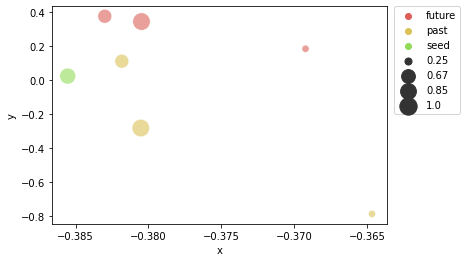

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


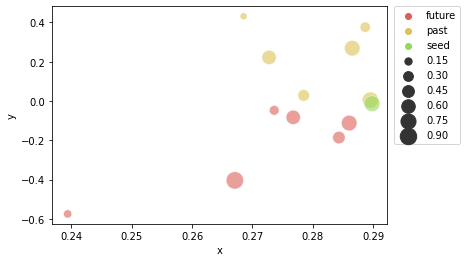

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


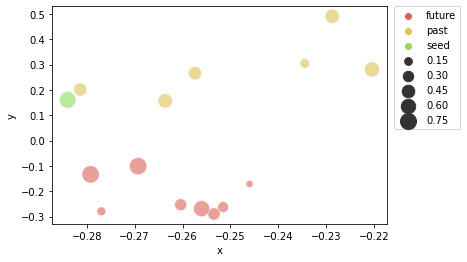

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


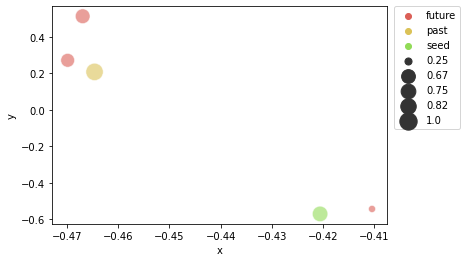

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


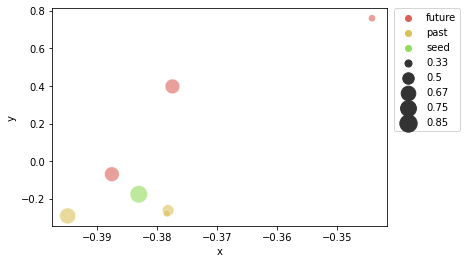

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


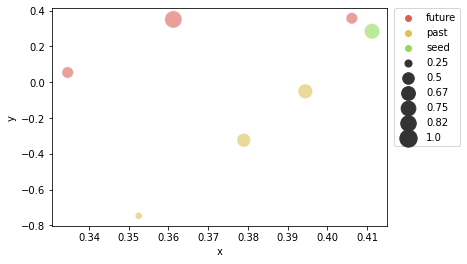

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


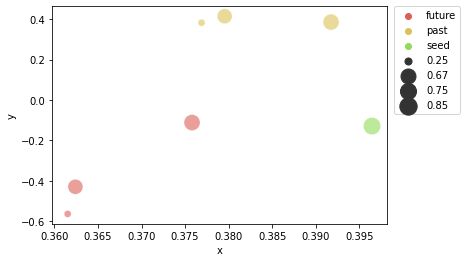

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


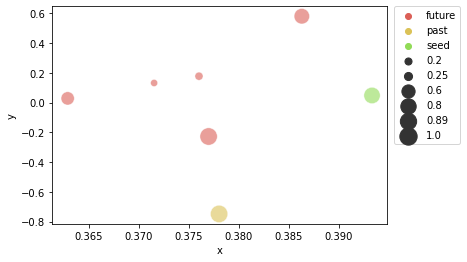

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


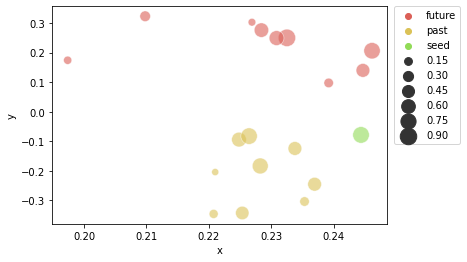

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


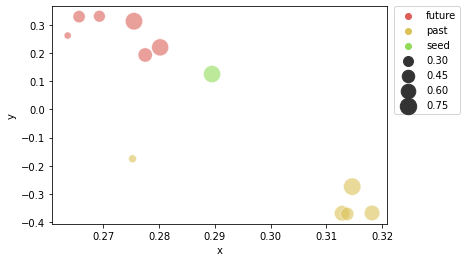

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


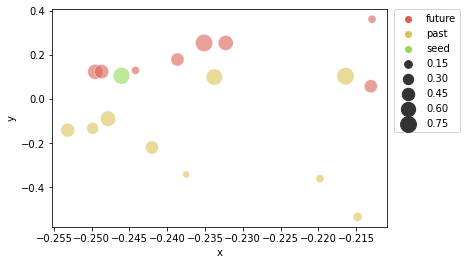

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


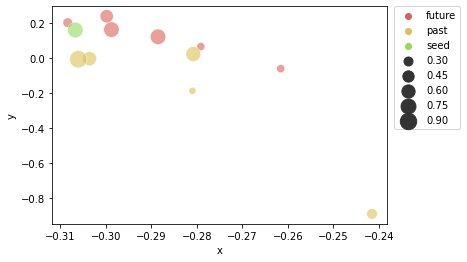

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


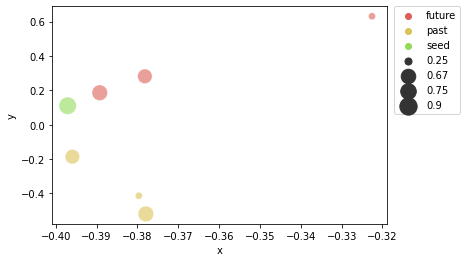

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


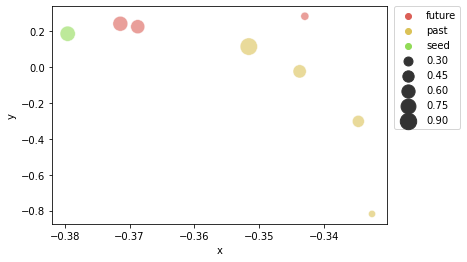

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


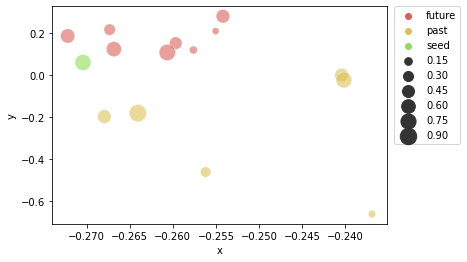

In [ ]:
## test tense of unsupervised vector
for i in range(25,40):
  
  vec_unsup = vectors_unsup[i]
  label_unsup = labels_unsup[i]
  degree = degree_unsup[i]
  filtered_vec,filtered_label,weights = filter(vec_unsup,label_unsup,degree,['seed','future','past'])
  filtered_vec = pca_result_nD(np.array(filtered_vec),2)
  visualize_weights(filtered_vec,filtered_label,weights)



<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


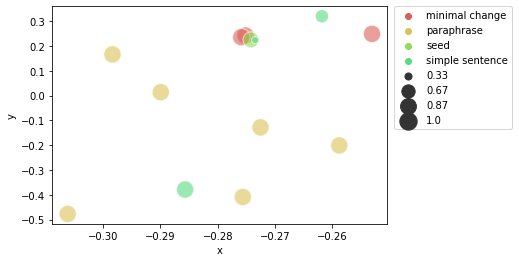

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


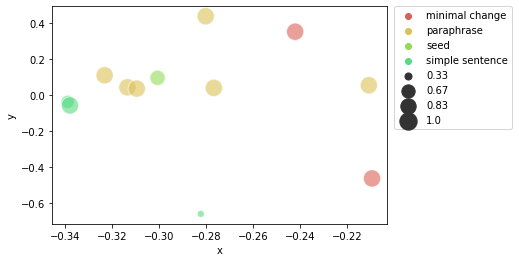

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


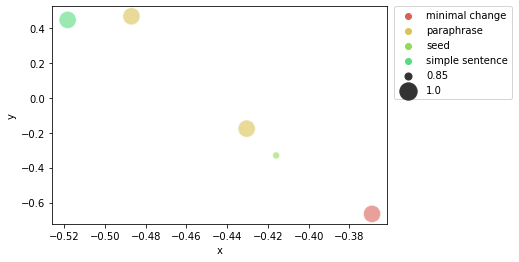

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


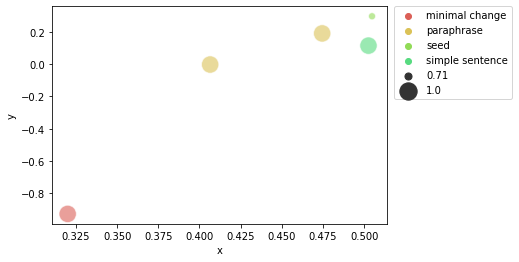

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


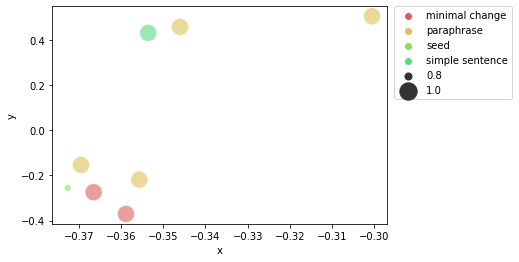

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


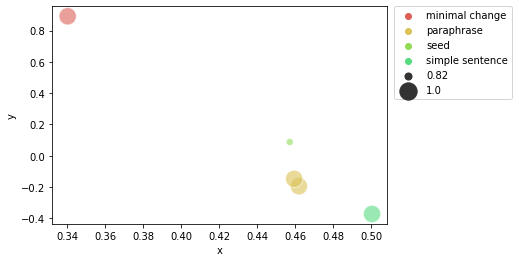

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


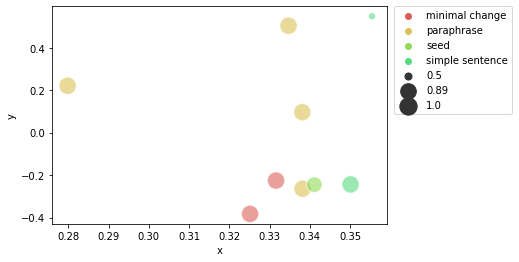

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


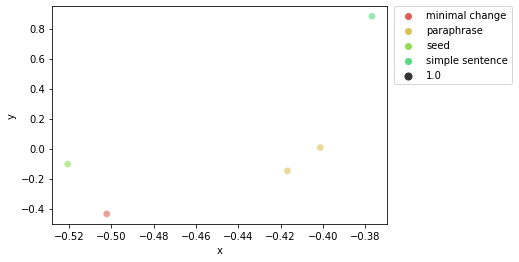

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


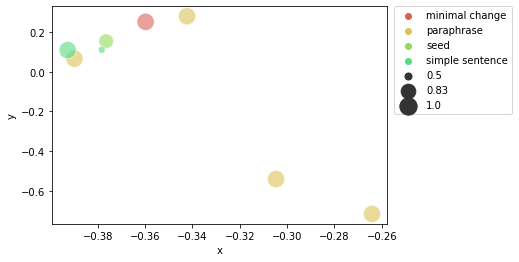

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


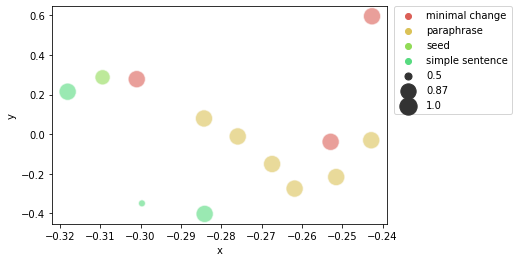

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


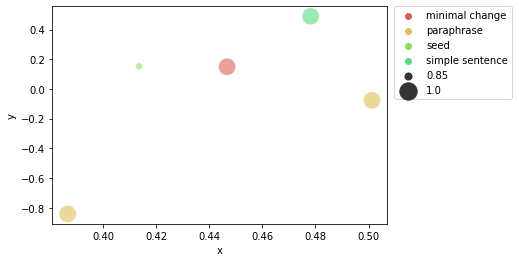

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


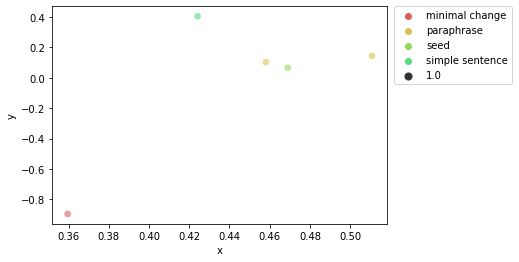

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


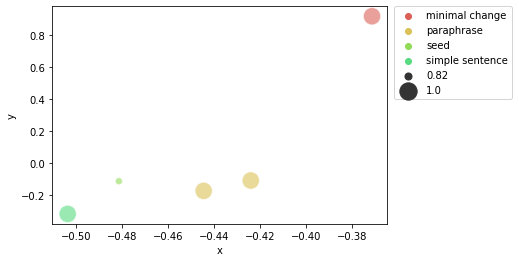

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


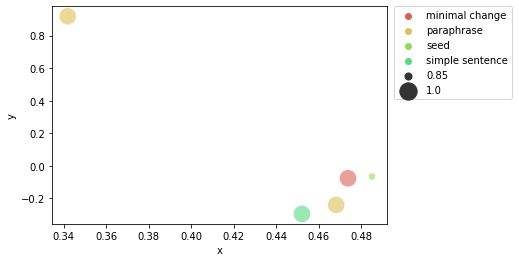

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


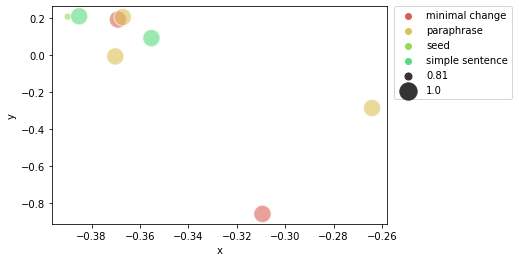

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


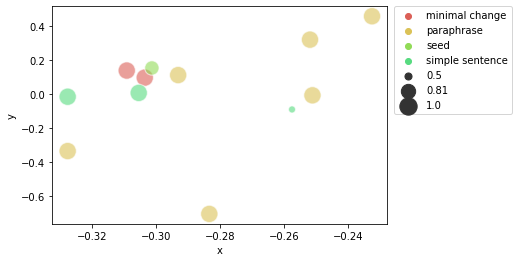

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


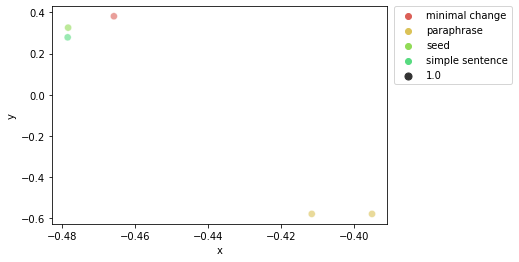

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


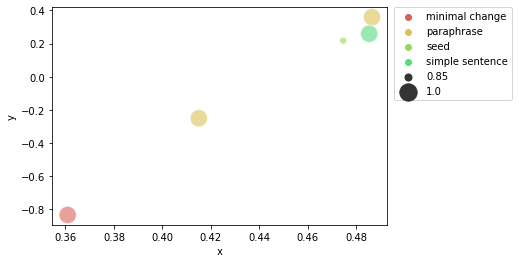

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


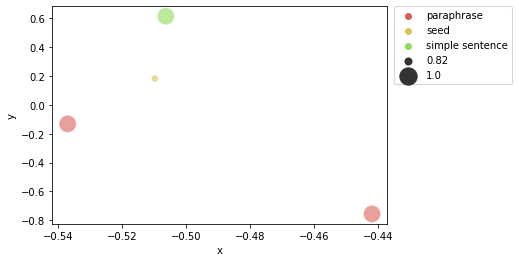

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


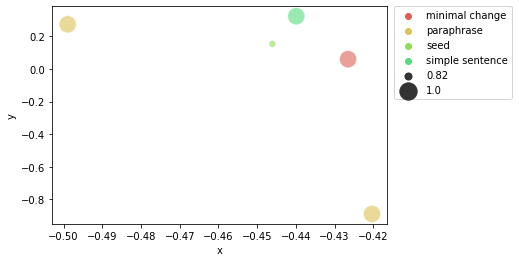

In [ ]:
## test labels 【similarity】 unsupervised vector
for i in range(20):
  vec_unsup_1 = vectors_unsup[i]
  label_unsup_1 = labels_unsup[i]
  weights = degree_unsup[i]
  filtered_vec_1,filtered_label_1,filtered_weights = filter(vec_unsup_1,label_unsup_1,weights,['paraphrase','seed','simple sentence','minimal change'])
  filtered_vec_1 = pca_result_nD(np.array(filtered_vec_1),2)
  visualize_weights(filtered_vec_1,filtered_label_1,filtered_weights)


<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


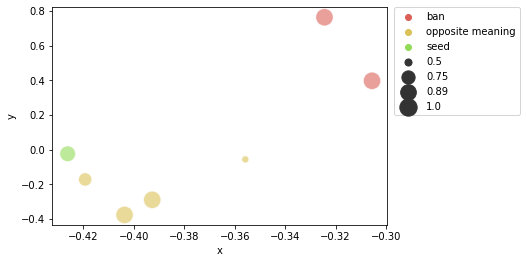

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


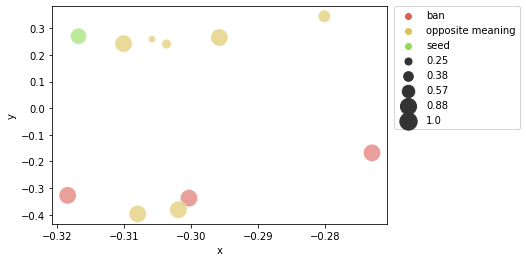

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


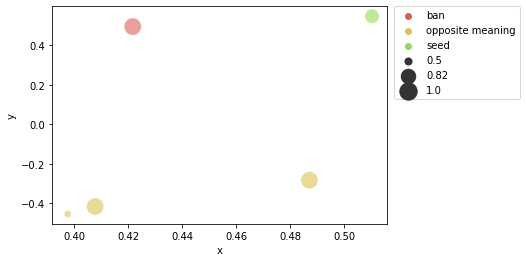

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


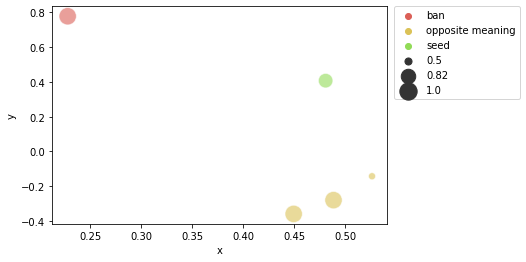

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


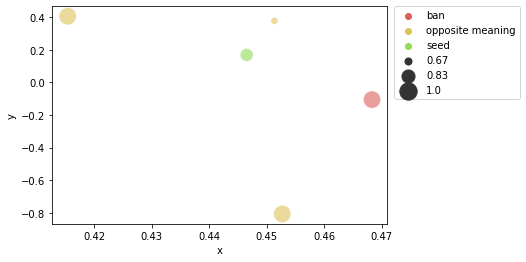

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


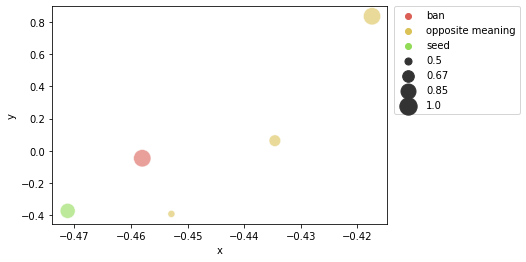

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


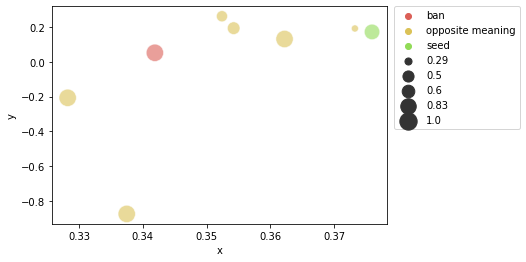

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


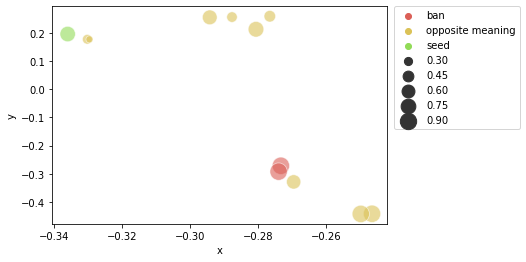

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


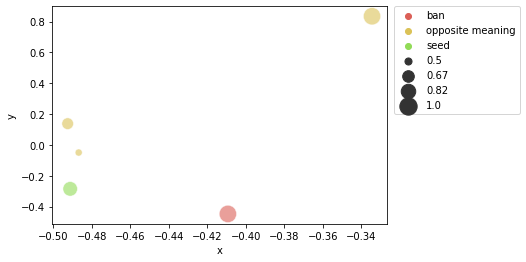

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


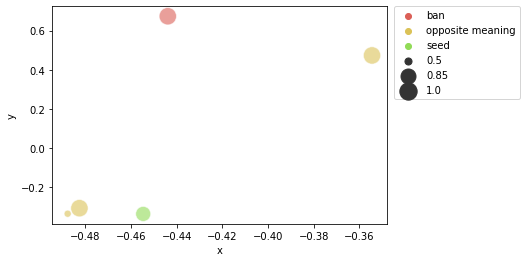

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


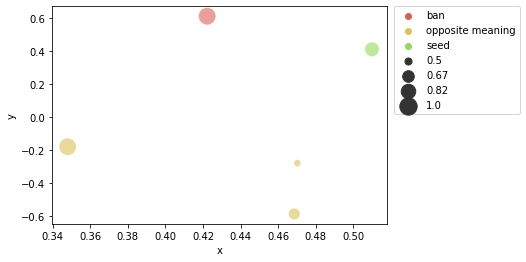

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


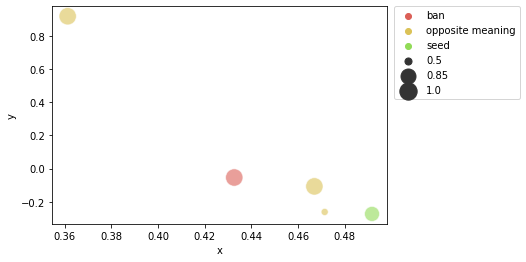

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


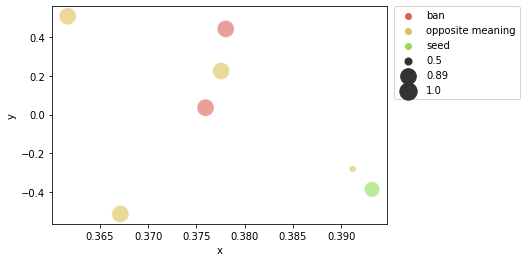

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


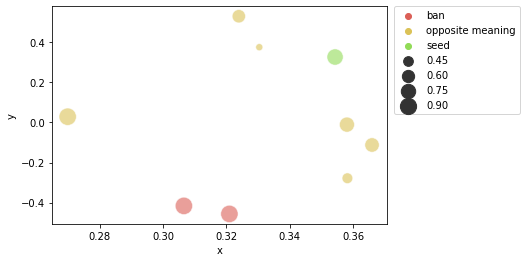

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


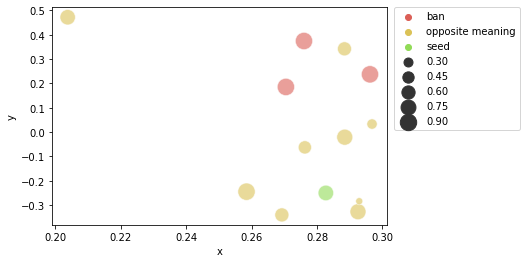

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


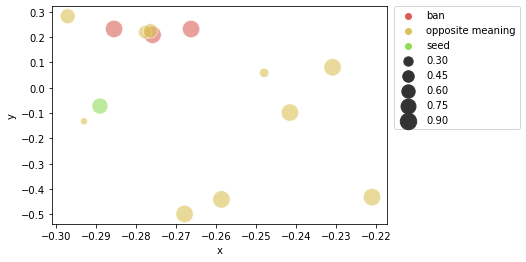

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


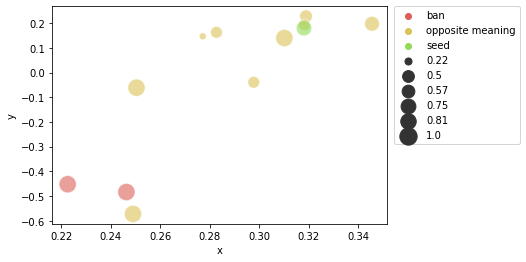

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


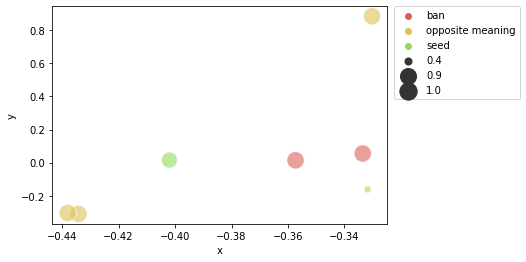

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


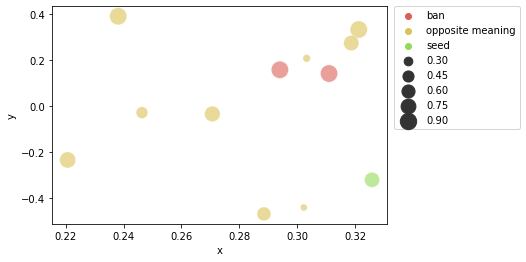

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


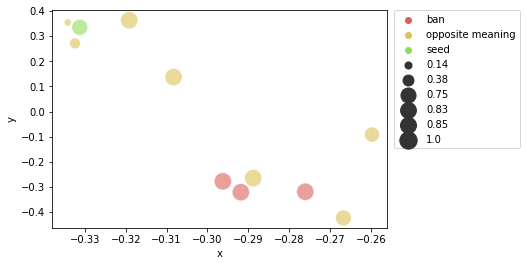

In [ ]:
## test labels 【different/opposite】 of unsupervised vector
for i in range(20,40):
  vec_unsup_1 = vectors_unsup[i]
  label_unsup_1 = labels_unsup[i]
  weights = degree_unsup[i]
  filtered_vec_1,filtered_label_1,filtered_weights = filter(vec_unsup_1,label_unsup_1,weights,['seed','opposite meaning','ban'])
  filtered_vec_1 = pca_result_nD(np.array(filtered_vec_1),2)
  visualize_weights(filtered_vec_1,filtered_label_1,filtered_weights)


<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


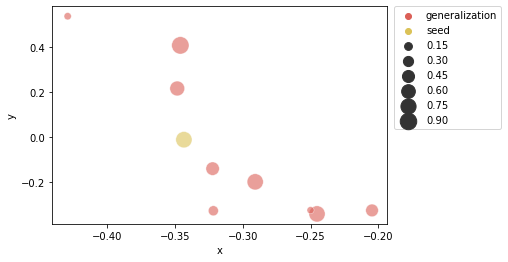

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


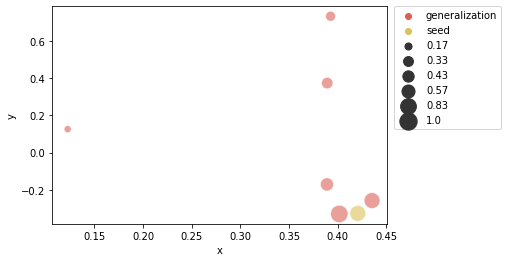

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


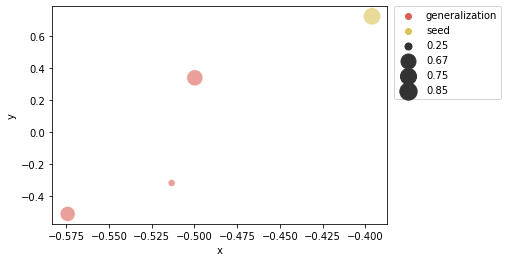

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


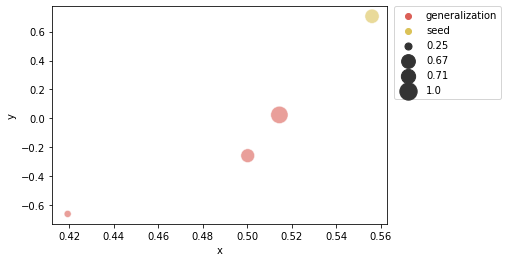

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


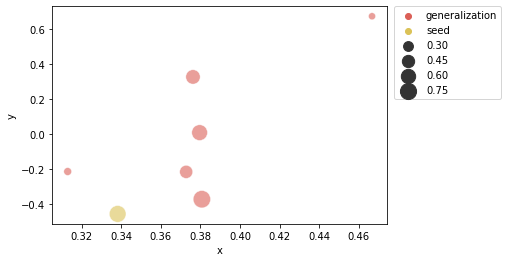

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


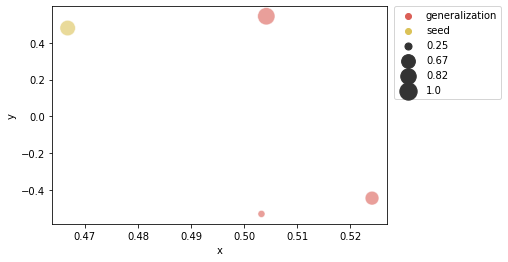

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


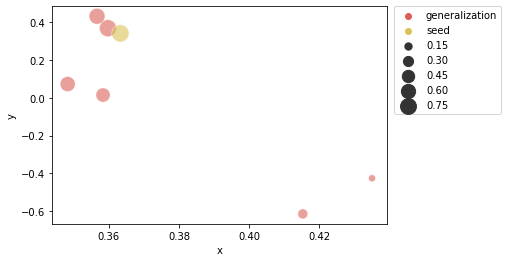

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


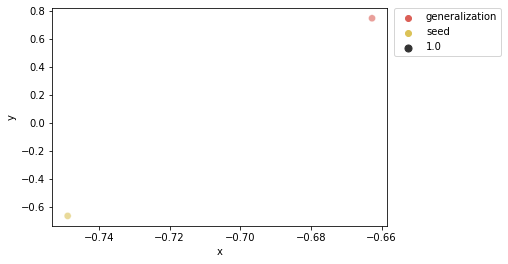

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


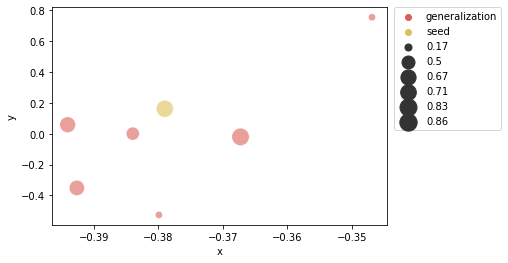

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


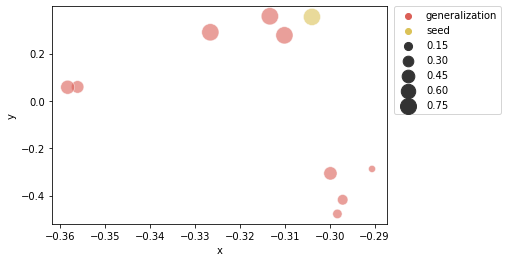

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


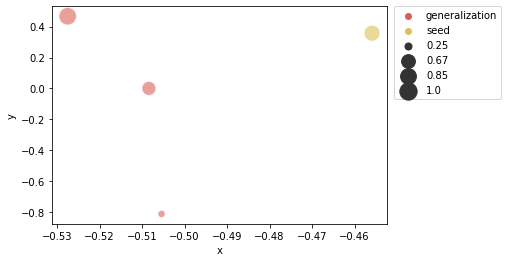

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


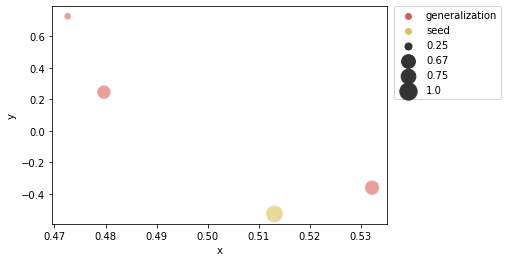

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


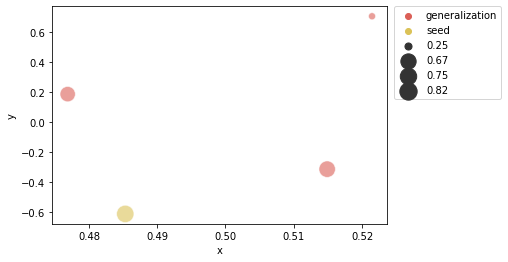

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


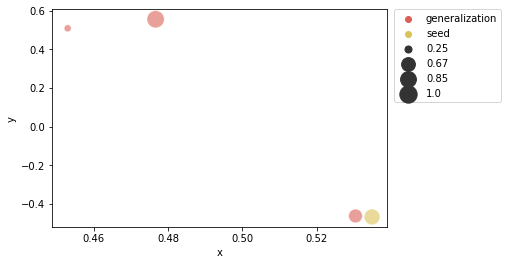

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


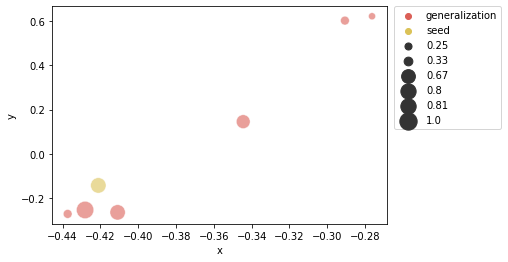

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


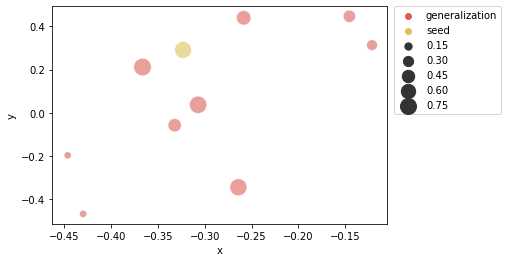

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


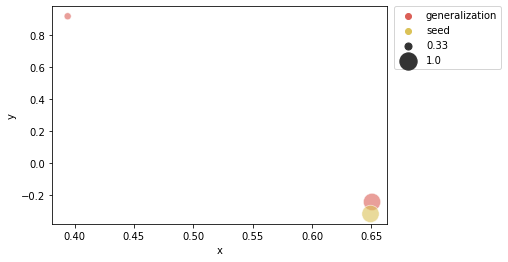

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


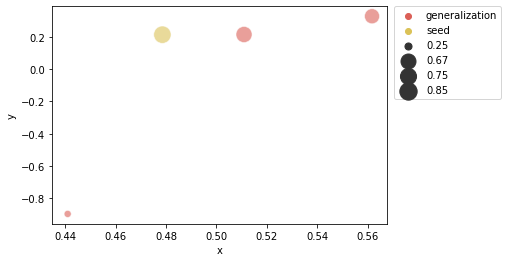

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


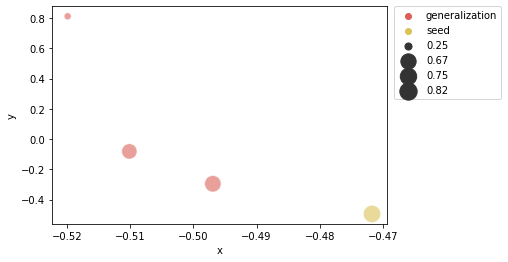

<ipython-input-96-447eec47586e>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",8),data=df,size = weight,sizes=(50,300),alpha=0.6)


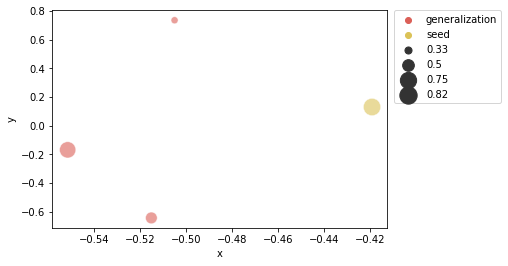

In [ ]:
## test labels 【generalization】 of unsupervised vector
for i in range(20):
  vec_unsup_1 = vectors_unsup[i]
  label_unsup_1 = labels_unsup[i]
  weights = degree_unsup[i]
  filtered_vec_1,filtered_label_1,filtered_weights = filter(vec_unsup_1,label_unsup_1,weights,['generalization','seed'])
  filtered_vec_1 = pca_result_nD(np.array(filtered_vec_1),2)
  visualize_weights(filtered_vec_1,filtered_label_1,filtered_weights)

<ipython-input-65-f927a4e0d167>:15: UserWarning: The palette list has more values (14) than needed (4), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",14),data=df,


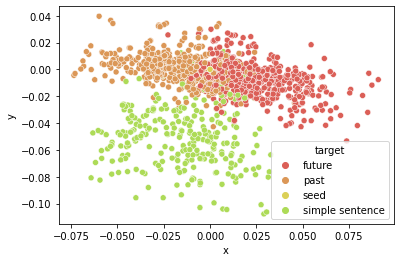

In [ ]:
## Test sense with bert model, PCA to 2D
vector_unsup,label = data_process('bert_vec_unsup.tsv')
filtered_vec,filtered_label = filter(vector_unsup,label,['seed','future','past','simple sentence'])
model_2_result = pca_result_nD(np.array(filtered_vec),2)
visualize(model_2_result,filtered_label)

<ipython-input-65-f927a4e0d167>:15: UserWarning: The palette list has more values (14) than needed (3), which may not be intended.
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",14),data=df,


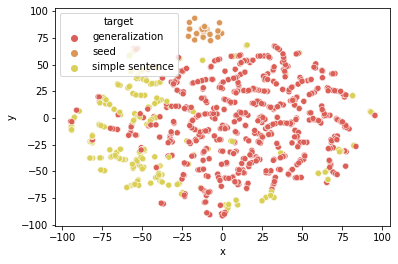

In [ ]:
filtered_vec,filtered_label = filter(vector_unsup,label,['seed','generalization','simple sentence'])
model_2_result = tsne_result(pca_result_nD(np.array(filtered_vec),5))
visualize(model_2_result,filtered_label)